In [63]:
import joblib
from sklearn.metrics import r2_score, mean_absolute_error
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from statsmodels.graphics.gofplots import qqplot
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import probplot
import sys
sys.path.append("..")
from randomforest import random_forest_CV
from tools import data_parser as dp
from data_visualisation import rf_vis

In [67]:
bert_data = "../data/combined_datasets_72.csv"
df = pd.read_csv(bert_data)

light, heavy, temp = dp.data_extract('../data/combined_datasets.csv')

X = df
y = temp

In [68]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 7)

In [69]:
model = joblib.load('../models/ab72_rfkf_28032023.joblib')

In [11]:
y_pred = model.predict(x_test)
residuals = y_test - y_pred

# create QQ plot
fig, ax = plt.subplots(figsize=(8, 5))
probplot(residuals, plot=ax)
ax.set_title('QQ Plot of Residuals')
ax.set_xlabel('Theoretical Quantiles')
ax.set_ylabel('Sample Quantiles')
plt.show()

In [13]:
result = random_forest_CV.eval_model(model,x_test,y_test)

In [14]:
result

In [76]:
model2 = joblib.load('../models/250123_RF.joblib')

bert_data = "../data/combined_bert_df.csv"
df = pd.read_csv(bert_data)

light, heavy, temp = dp.data_extract('../data/combined_datasets.csv')

X = df
Y = temp
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state = 7)

C:\Users\toon_\.virtualenvs\AntibodyFvTm50Predictor\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 1.0.2 when using version 1.1.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\toon_\.virtualenvs\AntibodyFvTm50Predictor\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator RandomForestRegressor from version 1.0.2 when using version 1.1.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [77]:
results = random_forest_CV.eval_model(model2,x_test,y_test)

In [78]:
MAE = results[0]
r2 = results[1]
pearson = results[2][0]

print ("MAE = ",MAE,"\nr2 = ",r2,"\npearson = ",pearson)

MAE =  4.355447770995359 
r2 =  0.178869167331293 
pearson =  0.5551978239526211


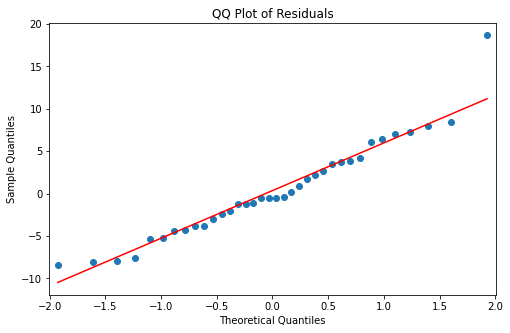

In [79]:
from statsmodels.graphics.gofplots import ProbPlot
y_pred = model2.predict(x_test)
residuals = y_test - y_pred
# create ProbPlot object
pp = ProbPlot(residuals)

# create Q-Q plot
fig, ax = plt.subplots(figsize=(8, 5))
pp.qqplot(line='s', ax=ax) #  standardized line, the expected order statistics are scaled by the standard deviation of the given sample and have the mean added to them
ax.set_title('QQ Plot of Residuals')
ax.set_xlabel('Theoretical Quantiles')
ax.set_ylabel('Sample Quantiles')
plt.show()

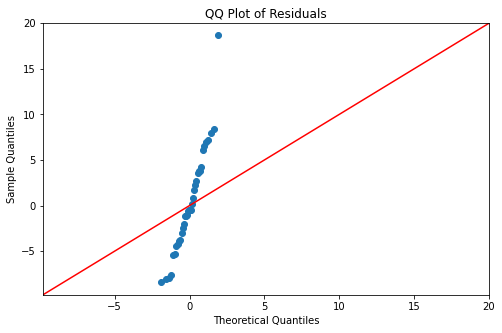

In [80]:
fig, ax = plt.subplots(figsize=(8, 5))
pp.qqplot(line='45', ax=ax)
ax.set_title('QQ Plot of Residuals')
ax.set_xlabel('Theoretical Quantiles')
ax.set_ylabel('Sample Quantiles')
plt.show()